In [ ]:
from google.colab import drive
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys
from google.colab.patches import cv2_imshow
from numpy.core.fromnumeric import reshape
from PIL import Image
from numpy import asarray
from typing_extensions import final
from numpy.core.fromnumeric import reshape
from PIL import Image
import math
from numpy.core.numeric import outer
from itertools import groupby
import matplotlib.pyplot as plt
from scipy.special import erfc

#Huffman Encoding

In [ ]:
pip install imageio-ffmpeg

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# image=imageio.imread('/content/drive/MyDrive/information theory/multi-color-3.jpg')
image=imageio.imread('/content/maybe.jfif')#import image

<ipython-input-331-986fadd7e122>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread('/content/maybe.jfif')#import image


In [ ]:
np.array(image).shape

(1920, 1080, 3)

In [ ]:
def gray(image):
  if image.ndim==3:
    R,G,B= image[:,:,0], image[:,:,1], image[:,:,2]
    #print("hello")
    Grayscale=0.2989 * R + 0.5870 * G + 0.1140 * B
    #print(np.array(Grayscale).shape)
  if image.ndim==4:
    R,G,B= image[:,:,:,0], image[:,:,:,1], image[:,:,:,2]
    Grayscale=0.2989 * R + 0.5870 * G + 0.1140 * B
  return Grayscale

In [ ]:
G=np.array(image)
GG=gray(image)

## 1- Read and divide the image into blocks of 8x8 pixels


In [ ]:
gray_image=gray(np.array(image))       #converting image into grayscaled
rows,cols=np.array(gray_image).shape   #putting image into rows and columns to be easier to loop on

In [ ]:
for i in range(0,rows,8):
   for j in range(0,cols,8):
      Blocks8x8 = gray_image[i:i+8,j:j+8] #using step of 8 to divide the image to 8x8 blocks
Blocks8x8.shape

(8, 8)

## 2- Perform DCT on each block (develop your own DCT, don’t use the ready-made function in MATLAB or Python)


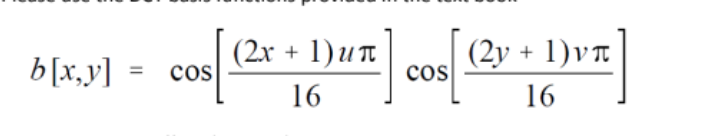

In [ ]:
b = np.zeros((8,8));
output = np.zeros((8,8));

for u in range(8):
    for v in range(8):
      for x in range(8):
        for y in range(8):
          b[x,y] = (math.cos(((((2*x)+1)*u*math.pi)/16)))*(math.cos((((2*y)+1)*v*math.pi)/16));

      output[u,v]=np.sum(np.multiply(b,Blocks8x8));
output

array([[ 1.79841380e+03, -4.03181823e+02,  3.67520550e+02,
         2.51338025e+00,  1.37629284e+02,  1.10346534e+02,
         5.22065515e-01,  5.27698255e-01],
       [-3.08695476e+02,  9.42135076e+01, -1.11914863e+02,
        -7.76183568e+01,  5.14402398e+01,  1.19920568e+00,
        -1.16871249e+02, -2.78218988e+00],
       [ 3.51598027e+02, -3.08171275e+01,  6.38570345e+01,
         2.60865918e+00,  1.78094910e+00,  5.10890987e+00,
         2.32036149e+00, -3.11412252e+00],
       [-1.14417683e+02,  7.25631987e+01, -4.41655528e+01,
         3.01594070e-01,  2.91364768e-01, -1.32569877e+00,
        -7.38024426e-03,  1.14599190e-01],
       [ 1.02874420e+02, -4.19798846e+01,  7.54120250e+01,
        -8.16906160e-01, -4.23700000e-01,  1.07142686e-01,
        -8.55991012e-01,  1.25303832e-01],
       [ 5.73397662e+01,  1.01280607e+00, -1.03345944e+00,
        -1.44098322e-01,  1.42952904e+00, -1.51850090e+00,
        -1.07343851e+00, -1.12938360e+00],
       [ 3.91652652e-01,  9.902507

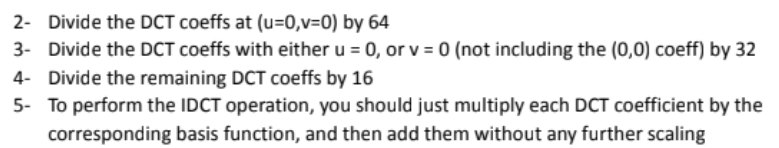

In [ ]:
def DCT(Blocks8x8):
  b = np.zeros((8,8));
  output = np.zeros((8,8));

  for u in range(8):
    for v in range(8):
      for x in range(8):
        for y in range(8):
          b[x,y] = (math.cos(((((2*x)+1)*u*math.pi)/16)))*(math.cos((((2*y)+1)*v*math.pi)/16));

      output[u,v]=np.sum(np.multiply(b,Blocks8x8));
  output [0,0] = output[0,0]/64;
  output [0,1:8]=output[0,1:8]/32;
  output [1:8,0] = output [1:8,0]/32;
  output [1:8,1:8] = output [1:8,1:8]/16;
  return output

In [ ]:
dct=DCT(Blocks8x8)

##decoding idct

In [ ]:
def IDCT(Blocks8x8):
  b = np.zeros((8,8));
  output = np.zeros((8,8));

  for u in range(8):
    for v in range(8):
      for x in range(8):
        for y in range(8):
          b[x,y] = (math.cos(((((2*x)+1)*u*math.pi)/16)))*(math.cos((((2*y)+1)*v*math.pi)/16));

      output=output+np.dot(Blocks8x8[u,v],b);
  return output

In [ ]:
idct=IDCT(Blocks8x8)

In [ ]:
dct

array([[ 2.81002156e+01, -1.25994320e+01,  1.14850172e+01,
         7.85431329e-02,  4.30091512e+00,  3.44832918e+00,
         1.63145473e-02,  1.64905705e-02],
       [-9.64673364e+00,  5.88834422e+00, -6.99467891e+00,
        -4.85114730e+00,  3.21501499e+00,  7.49503550e-02,
        -7.30445304e+00, -1.73886867e-01],
       [ 1.09874384e+01, -1.92607047e+00,  3.99106466e+00,
         1.63041198e-01,  1.11309319e-01,  3.19306867e-01,
         1.45022593e-01, -1.94632657e-01],
       [-3.57555260e+00,  4.53519992e+00, -2.76034705e+00,
         1.88496294e-02,  1.82102980e-02, -8.28561728e-02,
        -4.61265266e-04,  7.16244935e-03],
       [ 3.21482563e+00, -2.62374279e+00,  4.71325156e+00,
        -5.10566350e-02, -2.64812500e-02,  6.69641789e-03,
        -5.34994383e-02,  7.83148952e-03],
       [ 1.79186769e+00,  6.33003792e-02, -6.45912152e-02,
        -9.00614515e-03,  8.93455650e-02, -9.49063065e-02,
        -6.70899072e-02, -7.05864750e-02],
       [ 1.22391454e-02,  6.189066

In [ ]:
idct

array([[ 6.55272349e+02, -3.08520511e+02,  4.02156871e+02,
        -1.30393123e+02,  2.92151959e+02,  8.79567161e+01,
         1.06027062e+02,  7.26925178e+01],
       [-2.27999676e+02,  1.44280702e+02, -2.30546564e+02,
        -2.14187558e+01, -2.81884795e+01,  2.12407631e+00,
        -1.48877362e+02, -7.01590127e+01],
       [ 4.14828109e+02, -1.40256656e+02,  2.41920707e+02,
        -3.06801560e+01,  1.20136759e+02,  3.46813659e+01,
         9.49168667e+01,  5.35035227e+01],
       [-1.27884014e+02,  1.10641929e+02, -1.40859124e+02,
         1.58007401e+01, -2.81582895e+01,  9.30659728e+00,
        -5.67242433e+01, -2.27785412e+01],
       [ 2.23795615e+02, -9.64078545e+01,  2.03483887e+02,
        -4.12831501e+01,  9.40686833e+01,  1.76009015e+01,
         5.12529954e+01,  2.94830646e+01],
       [ 4.32120501e+01,  1.00772519e+01, -1.07107896e+01,
        -9.12507647e+00,  2.24635496e+01,  1.02650761e+01,
        -1.46737913e+01, -4.71066080e+00],
       [ 1.27040234e+02, -4.260590

##3- Perform the quantization step per 8x8 block using at least two quantization tables


In [ ]:
def quantizationtable1():
    return np.array([ [1, 1, 1, 1, 1, 2, 2, 4],
                      [1, 1, 1, 1, 1, 2, 2, 4],
                      [1, 1, 1, 1, 2, 2, 2, 4],
                      [1, 1, 1, 1, 2, 2, 4, 8],
                      [1, 1, 2, 2, 2, 2, 4, 8,],
                      [2, 2, 2, 2, 2, 4, 8, 8],
                      [2, 2, 2, 4, 4, 8, 8, 16],
                      [4, 4, 4, 4, 8, 8, 16, 16]]);

In [ ]:
def quantizationtable2():
    return np.array([    [1, 2, 4, 8, 16, 32, 64, 128],
                         [2, 4, 4, 8, 16, 32, 64, 128],
                         [4, 4, 8, 16, 32, 64, 128, 128],
                         [8, 8, 16, 32, 64, 128, 128, 256],
                         [16, 16, 32, 64, 128, 128, 256, 256],
                         [32, 32, 64, 128, 128, 256, 256, 256],
                         [64, 64, 128, 128, 256, 256, 256, 256],
                         [128, 128, 128, 256, 256, 256, 256, 256]]);

In [ ]:
def quantizationtable3():
    return np.array([    [17, 18, 24, 47, 99, 99, 99, 99],
                         [18, 21,26 ,66,  99, 99, 99, 99],
                         [24, 26, 56, 99, 99, 99, 99, 99],
                         [47, 66, 99, 99, 99, 99, 99, 99],
                         [99, 99, 99, 99, 99, 99, 99, 99],
                         [99, 99, 99, 99, 99, 99, 99, 99],
                         [99, 99, 99, 99, 99, 99, 99, 99],
                         [99, 99, 99, 99, 99, 99, 99, 99]]);

In [ ]:
After_quantizing1 = np.divide(dct, quantizationtable1()).round()
After_quantizing1

array([[ 28., -13.,  11.,   0.,   4.,   2.,   0.,   0.],
       [-10.,   6.,  -7.,  -5.,   3.,   0.,  -4.,  -0.],
       [ 11.,  -2.,   4.,   0.,   0.,   0.,   0.,  -0.],
       [ -4.,   5.,  -3.,   0.,   0.,  -0.,  -0.,   0.],
       [  3.,  -3.,   2.,  -0.,  -0.,   0.,  -0.,   0.],
       [  1.,   0.,  -0.,  -0.,   0.,  -0.,  -0.,  -0.],
       [  0.,   0.,   0.,   0.,  -0.,   0.,  -0.,  -0.],
       [  0.,   0.,   0.,   0.,   0.,  -0.,  -0.,   0.]])

In [ ]:
After_quantizing2 = np.divide(dct, quantizationtable2()).round()
After_quantizing2

array([[28., -6.,  3.,  0.,  0.,  0.,  0.,  0.],
       [-5.,  1., -2., -1.,  0.,  0., -0., -0.],
       [ 3., -0.,  0.,  0.,  0.,  0.,  0., -0.],
       [-0.,  1., -0.,  0.,  0., -0., -0.,  0.],
       [ 0., -0.,  0., -0., -0.,  0., -0.,  0.],
       [ 0.,  0., -0., -0.,  0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0., -0.,  0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0., -0., -0.,  0.]])

In [ ]:
After_quantizing3 = np.divide(dct, quantizationtable3()).round()
After_quantizing3

array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0., -0., -0.,  0.,  0., -0., -0.],
       [ 0., -0.,  0.,  0.,  0.,  0.,  0., -0.],
       [-0.,  0., -0.,  0.,  0., -0., -0.,  0.],
       [ 0., -0.,  0., -0., -0.,  0., -0.,  0.],
       [ 0.,  0., -0., -0.,  0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0., -0.,  0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0., -0., -0.,  0.]])

##4- Transform each block from 2-D into 1-D vector using the following pattern



from 8x8 to 1x64

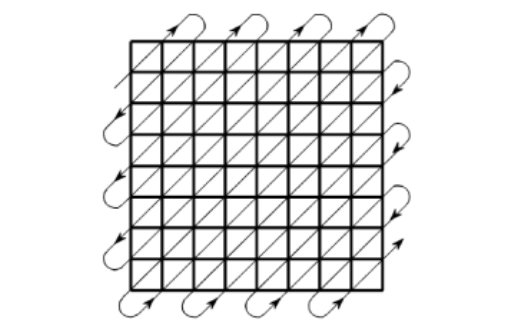

even to the right odd to the left

In [ ]:
for r in result:
    for c in r:
        one_dvector.append(c)

In [ ]:
one_dvector

[7.0, -1.0, 1.0, -0.0, -0.0, 0.0, -0.0, -0.0]

In [ ]:
def two_to_1d(After_quantizing):
      rows,cols=np.array(After_quantizing).shape
      one_dvector=[]
      result=[[] for r in range(rows+cols-1)]
      sum=0
      for ro in range(rows):
        for co in range(cols):
          sum=ro+co
          if(sum%2 ==0):
              result[sum].insert(0,After_quantizing[ro][co])
          else:
              result[sum].append(After_quantizing[ro][co])
      for r in result:
         for c in r:
             one_dvector.append(c)
      return one_dvector

##5- Use run-length encoding to compress the stream of zeros that may results due to the quantization (use your own developed code)


In [ ]:
run_length=[]
for value, count in groupby(one_dvector):
    run_length.append([len(list(count)), value])

In [ ]:
run_length

[[1, 7.0], [1, -1.0], [1, 1.0], [5, -0.0]]

In [ ]:
def run_length(one_dvector):
  run_length=[]
  for value, count in groupby(one_dvector):
     run_length.append([len(list(count)), value])
  return run_length



In [ ]:
run_length(one_dvector)

[[1, 7.0], [1, -1.0], [1, 1.0], [5, -0.0]]

## 6- Use your own developed Huffman encoder (from scratch) after run-length code

Firstly, *Calculate frquencies function* Counts the frequency of each unique pixel and gives out the frequency Table,a dictionary where keys are pixel values, and the values are their frequencies.

Then we build the Huffman tree from a frequency table Create leaf nodes for each pixel frequency and combine nodes with the smallest frequencies until a root node is formed and we Return this root node of the Huffman tree.

We assign Huffman codes to each leaf node in the tree and recursively traverses the tree, appending '0' for left branches and '1' for right branches and outputs codes which is a dictionary where keys are pixel values, and values are their corresponding Huffman codes.

In [ ]:
def calculateFrequencies(data):
    frequencyTable = dict()
    for item in data:
        if frequencyTable.get(item) == None:
            frequencyTable[item] = 1
        else:
            frequencyTable[item] += 1
    return frequencyTable

class Node:
    def __init__(self, pixel, frequency):
        self.pixel = pixel
        self.frequency = frequency
        self.left = None
        self.right = None
        self.code= ''

def buildTree(frequencies):
  nodes=[]
  for char,freq in frequencies.items():
    node= Node(char,freq)
    nodes.append(node)

  # sorting all the nodes in ascending order based on their probability
  nodes = sorted(nodes, key = lambda x: x.frequency)

  while len(nodes) > 1:
        # picking two smallest nodes
        right = nodes[0]
        left = nodes[1]

        left.code = 0
        right.code = 1

        # combining the 2 smallest nodes to create new node
        parent = Node(left.pixel + right.pixel ,left.frequency + right.frequency)
        parent.left=left
        parent.right=right
        nodes.remove(left)
        nodes.remove(right)
        nodes.append(parent)
  return nodes[0]

#Calculating the codes for each pixel
codes={}
def CalculateCodes(node, value = ''):
    # a huffman code for current node
    newValue = value + str(node.code)
    if(node.left):
        CalculateCodes(node.left, newValue)
    if(node.right):
        CalculateCodes(node.right, newValue)
    if(not node.left and not node.right):
        codes[node.pixel] = newValue
    return codes

def huffman_encode(data):
  encodingOutput = []

  freqTable=calculateFrequencies(data)
  rootNode=buildTree(freqTable)
  codeDict=CalculateCodes(rootNode,'')

  for element in data:
    encodingOutput.append(codeDict[element])

  encodedImage = ''.join([str(item) for item in encodingOutput])

  #print("Code Dictionary", codeDict) #this is not a necessary step, I was just trying to decode using the dictionary instead of the tree but 7asal kheir
  return encodedImage,rootNode

## Encoding

In [ ]:
def compressing_image(image):
  bits=0
  gray_image=gray(np.array(image))
  rows,cols=np.array(gray_image).shape
  for i in range(0,rows,8):
    for j in range(0,cols,8):
      Blocks8x8 = gray_image[i:i+8,j:j+8]#dividing image into 8x8 blocks
      dct=DCT(Blocks8x8)#applying dct
      After_quantizing = np.divide(dct, quantizationtable3()).round()#quantizing using quantization tables
      #applying zigzag transformation
      rows,cols=np.array(After_quantizing).shape
      one_dvector=[]
      result=[[] for r in range(rows+cols-1)]
      sum=0
      for ro in range(rows):
        for co in range(cols):
          sum=ro+co
          if(sum%2 ==0):
              result[sum].insert(0,After_quantizing[ro][co])
          else:
              result[sum].append(After_quantizing[ro][co])
      for r in result:
         for c in r:
             one_dvector.append(c)
      #applying runlength on each block
      run_length=[]
      for value, count in groupby(one_dvector):
           run_length.append([len(list(count)), value])
      beforehuff=[]
      for x in run_length:
          for y in x:
              beforehuff.append(y)
      after_huf, tree =huffman_encode(beforehuff)
      #print(after_huf, tree)

      bits = bits + len(after_huf);
      #print(bits)
      return after_huf, tree,bits



In [ ]:
after_huf, tree,bits=compressing_image(image)
print(after_huf, tree)

11100100 <__main__.Node object at 0x7c50a494bb20>


In [ ]:
compressing_image(image)

('11100100', <__main__.Node at 0x7c50a4949690>, 8)

In [ ]:
def compressing_image_ef(image):
 bits=0
 for i in range(0,rows,8):
   for j in range(0,cols,8):
      Blocks8x8 = gray_image[i:i+8,j:j+8]#dividing image into 8x8 blocks
      dct=DCT(Blocks8x8)#applying dct
      After_quantizing = np.divide(dct, quantizationtable1()).round()#quantizing using quantization tables
      print(After_quantizing)
      one_dvector=two_to_1d(After_quantizing)
      print(one_dvector)
      runlength=run_length(one_dvector)
      beforehuff=[]
      print(runlength)
      for x in runlength:
          for y in x:
              beforehuff.append(y)
      after_huf, tree =huffman_encode(beforehuff)

      bits = bits + len(after_huf);
      return after_huf, tree,bits


#Covolutional Encoder

In the encoding process, you are required to divide your block of bits
into smaller blocks and encode each one individually. The same will be
done at the decoder. After each block, you are required to add a
specific number of zeros to ensure that the encoder state returns back
to the all zeros state.

In [ ]:
def convolutional_encoder(input):
    initial_state = [0, 0, 0]
    encoded= []
    for bit in input:
        initial_state = [bit] + initial_state[:2]
        g1=(initial_state[0]^initial_state[1])
        g2=(initial_state[0]^initial_state[1]^initial_state[2])
        g3=(initial_state[1]^initial_state[2])
        encoded.extend([g1, g2, g3])
    return encoded,initial_state


input =[1, 0, 1, 0, 1]
convolutional_encoder(input)

([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1])

In [ ]:
def addzeros(initial_state,K,encoded):
    for _ in range(K-1):
        initial_state = [0] + initial_state[:2]
        g1 = initial_state[0] ^ initial_state[1]
        g2 = initial_state[0] ^ initial_state[1] ^ initial_state[2]
        g3 = initial_state[1] ^ initial_state[2]
        encoded.extend([g1, g2, g3])
        # Yield the calculated values
        return encoded
input_s = [1, 0, 1, 1, 0, 0]
con,initial_state=convolutional_encoder(input_s)
encoded_data=addzeros(initial_state,3,con)
encoded_data

[1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]

#BPSK Modulation

In [ ]:
n = 1000
no_bits = len(encoded_data)

def bpsk_mod(encoded, fc, Eb, Tb, n):
    total_duration = Tb * len(encoded_data)
    t_step = Tb / n
    t = np.arange(0, total_duration, t_step)  # Time vector for modulation
    modulated_signal = []

    for bit in encoded:
        symbol = np.sqrt(2*Eb / Tb) * np.cos(2*np.pi*fc*t)  # Baseband BPSK signal
        symbol[0:n] *= -1 if bit == 0 else 1  # Apply bit information
        modulated_signal.append(symbol)

    return modulated_signal

In [ ]:
fc=1000
Eb=1
Tb=1
modulated_signal=bpsk_mod(encoded_data,fc , Eb, Tb, n)

#AWGN Channel

In [ ]:
def awgn_channel(modulated_signal, EbN0):
    noise_std_dev = np.sqrt(Eb / (2 * Tb * 10**(EbN0/10)))
    noisy_signal = []
    for symbol in modulated_signal:
        noise = np.random.normal(0, noise_std_dev, len(symbol))
        noisy_symbol = symbol + noise
        noisy_signal.append(noisy_symbol)

    return noisy_signal



In [ ]:
EbN0 = 10
noisy_signal = awgn_channel(modulated_signal, EbN0)

#BPSK Demodulator

In [ ]:
def bpsk_demod(noisy_signal, fc, Tb, n):
    total_duration = Tb * len(encoded_data)
    t_step = Tb / n
    t = np.arange(0, total_duration, t_step)

    demodulated_signal = []
    for symbol in noisy_signal:
        # Use the first n samples of the symbol for demodulation
        product = symbol[0:n] * np.cos(2*np.pi*fc*t[0:n])
        integral = np.trapz(product, t[0:n])
        bit = 1 if integral > 0 else 0
        demodulated_signal.append(bit)

    return demodulated_signal

In [ ]:
demodulated_signal = bpsk_demod(noisy_signal, fc, Tb, n)

print("Original bits:", encoded_data)
print("Demodulated bits:", demodulated_signal)

Original bits: [1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]
Demodulated bits: [1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]


#Convolutional Decoder

In [ ]:
def viterbi_decoder(received_bits, num_states=4, constraint_length=3):
    trellis = [[0] * num_states for _ in range(len(received_bits))]
    paths = [[None] * num_states for _ in range(len(received_bits))]

    for state in range(num_states):
        trellis[0][state] = 0

    for i in range(1, len(received_bits)):
        for current_state in range(num_states):
            branch_metrics = []
            for prev_state in range(num_states):
                branch_metric = sum(1 for j in range(constraint_length) if received_bits[i - j] != (current_state >> j) & 1)
                branch_metrics.append((trellis[i - 1][prev_state] + branch_metric, prev_state))
            trellis[i][current_state], paths[i][current_state] = min(branch_metrics)

    best_path = []
    current_state = trellis[-1].index(min(trellis[-1]))
    for i in range(len(received_bits) - 1, -1, -1):
        best_path.append(current_state)
        current_state = paths[i][current_state]
    best_path.reverse()

    decoded_bits = [current_state >> 1 for current_state in best_path[::2]][:len(input)]
    return decoded_bits

decoded_sequence = viterbi_decoder(encoded_data)
print("Input Bits:", input)
print("Decoded Bits:", decoded_sequence)


Input Bits: [1, 0, 1, 1, 1]
Decoded Bits: [0, 1, 1, 1, 0]


#Huffman Decoder

##7- Use your own developed Huffman decoder (from scratch) to decode the Huffman encoded stream


In [ ]:
def huffman_decode(encodedData, Tree):
    treeHead = Tree
    decodedImage = []
    for x in encodedData:
        if x == '1':
            Tree = Tree.right
        elif x == '0':
            Tree = Tree.left
        try:
            if Tree.left.pixel == None and Tree.right.pixel == None:
                pass
        except AttributeError:
            decodedImage.append(Tree.pixel)
            Tree = treeHead

    string = ''.join([str(item) for item in decodedImage])
    return decodedImage

## Decoding

In [ ]:
after_huf, tree,bits=compressing_image(image)
compression_rate=8*rows*cols/bits
print(compression_rate)

2073600.0


In [ ]:
bits

8

##**8**- Perform run-length decoding (use your own developed code)


In [ ]:
print(huffman_decode(after_huf, tree))

[1, 2.0, 63, -0.0]


In [ ]:
huffman_decoded=huffman_decode(after_huf, tree)

In [ ]:
huffman_decoded

[1, 2.0, 63, -0.0]

In [ ]:
def decoded_runlength(huffman_decoded):
  decoded_runlengt=[]
  for i in range(0, len(huffman_decoded),2 ):
       for d in range(int(huffman_decoded[i])):
          decoded_runlengt.append(huffman_decoded[i+1])
  return decoded_runlengt

In [ ]:
run_length

<function __main__.run_length(one_dvector)>

In [ ]:
decoded_runlengt=decoded_runlength(huffman_decoded)

In [ ]:
decoded_runlengt

[2.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0]

##9- Transform the 1-D vector into groups of 8x8 matrices


In [ ]:
def Inv_zigzag(runlength_decoded):

  runlength_decoded_length = len(runlength_decoded)
  size = int(math.sqrt(runlength_decoded_length))
  ZigZag_decoded = np.zeros([size,size],dtype=int)

  array_1 = np.concatenate([[i for i in range(1,size)],[i for i in range(size,0,-1)]])
  array_2 = np.array([np.sum(array_1[0:i]) for i in range(1, array_1.size)])

  X = np.split(runlength_decoded,array_2) #one to two dimensions


  for i in range(size):
        for j in range(size):
            ZigZag_decoded[i,j] = X[i+j][-1-i+max(0,i+j-size+1) if (i+j)%2==0 else i-max(0,i+j-size+1)]

  return ZigZag_decoded


In [ ]:
inverse_transform=Inv_zigzag(decoded_runlengt)

In [ ]:
inverse_transform

array([[2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

##10- Multiply each group by the quantization tables


In [ ]:
dequantization=np.multiply(inverse_transform,quantizationtable1())

##11- Perform IDCT using your own developed function on each 8x8 pixel group (develop
your own DCT, don’t use the ready-made function in MATLAB or Python)


In [ ]:
d_idct=IDCT(dequantization)

##12- Combine the 8x8 pixel groups into a single image and save it back to a file


In [ ]:
decoded_gray_image =np.zeros((rows,cols),dtype=np.uint8);
for i in range(0,rows,8):
   for j in range(0,cols,8):
     decoded_gray_image[i:i+8,j:j+8]=d_idct
d_idct.shape

(8, 8)

##13- Compare the original image with the compressed image when using each quantization table in step (3)

###low compression

Streaming output truncated to the last 5000 lines.
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[25 25 26 ... 65 65 65]
 [24 25 26 ... 65 65 65]
 [24 24 25 ... 65 65 65]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[25 25 26 ... 65 65 65]
 [24 25 26 ... 65 65 65]
 [24 24 25 ... 65 65 65]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[25 25 26 ... 65 65 65]
 [24 25 26 ... 65 65 65]
 [24 24 25 ... 65 65 65]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[25 25 26 ... 65 65 65]
 [24 25 26 ... 65 65 65]
 [24 24 25 ... 65 65 65]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[25 25 26 ... 65 65 65]
 [24 25 26 ... 65 65 65]
 [24 24 25 ... 65 65 65]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[25 25 26 ... 65 65 65]
 [24 25 26 ... 65 65 65]
 [24 24 25 ... 65 65 65]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ..

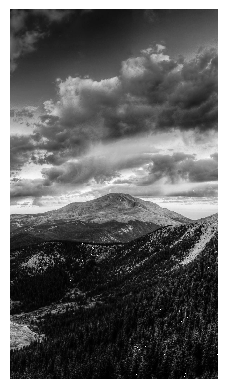

In [ ]:
decoded_gray_image =np.zeros((rows,cols),dtype=np.uint8);
for i in range(0,rows,8):
  for j in range(0,cols,8):
      Blocks8x8 = gray_image[i:i+8,j:j+8]#dividing image into 8x8 blocks
      dct=DCT(Blocks8x8)#applying dct
      After_quantizing = np.divide(dct, quantizationtable1()).round()#quantizing using quantization tables
      #print(After_quantizing)
      one_dvector=two_to_1d(After_quantizing)
      #print(one_dvector)
      runlength=run_length(one_dvector)
      beforehuff=[]
      #print(runlength)
      for x in runlength:
          for y in x:
              beforehuff.append(y)
      after_huf, tree =huffman_encode(beforehuff)

      bits = bits + len(after_huf);

      decoded_huff=huffman_decode(after_huf, tree)


      decoded_runlengt=decoded_runlength(decoded_huff)

      inverse_transform = Inv_zigzag(decoded_runlengt)

      dequantization=np.multiply(inverse_transform,quantizationtable1())

      d_idct=IDCT(dequantization)

      decoded_gray_image[i:i+8,j:j+8]=d_idct
      print(decoded_gray_image)

final=decoded_gray_image
plt.imshow(final, cmap='gray', interpolation='nearest')
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
compression_rate=8*rows*cols/bits
print(compression_rate)

5.312140447910839


In [ ]:
np.array(final).shape

(1920, 1080)

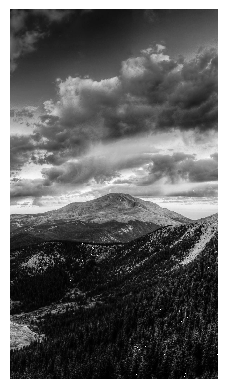

In [ ]:
plt.imshow(final, cmap='gray', interpolation='nearest')
plt.axis('off')  # Turn off axis labels
plt.show()

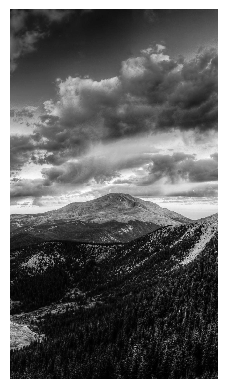

In [ ]:
plt.imshow(gray_image, cmap='gray', interpolation='nearest')
plt.axis('off')  # Turn off axis labels
plt.show()

###high compression

Streaming output truncated to the last 5000 lines.
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[25 25 25 ... 66 66 66]
 [25 25 26 ... 66 66 66]
 [25 25 26 ... 66 66 66]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[25 25 25 ... 66 66 66]
 [25 25 26 ... 66 66 66]
 [25 25 26 ... 66 66 66]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[25 25 25 ... 66 66 66]
 [25 25 26 ... 66 66 66]
 [25 25 26 ... 66 66 66]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[25 25 25 ... 66 66 66]
 [25 25 26 ... 66 66 66]
 [25 25 26 ... 66 66 66]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[25 25 25 ... 66 66 66]
 [25 25 26 ... 66 66 66]
 [25 25 26 ... 66 66 66]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[25 25 25 ... 66 66 66]
 [25 25 26 ... 66 66 66]
 [25 25 26 ... 66 66 66]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ..

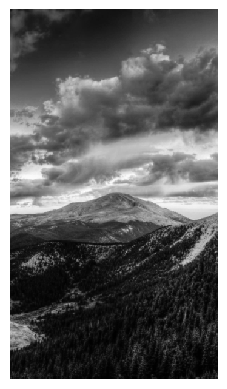

In [ ]:
decoded_gray_image =np.zeros((rows,cols),dtype=np.uint8);
for i in range(0,rows,8):
  for j in range(0,cols,8):
      Blocks8x8 = gray_image[i:i+8,j:j+8]#dividing image into 8x8 blocks
      dct=DCT(Blocks8x8)#applying dct
      After_quantizing = np.divide(dct, quantizationtable2()).round()#quantizing using quantization tables
      #print(After_quantizing)
      one_dvector=two_to_1d(After_quantizing)
      #print(one_dvector)
      runlength=run_length(one_dvector)
      beforehuff=[]
      #print(runlength)
      for x in runlength:
          for y in x:
              beforehuff.append(y)
      after_huf, tree =huffman_encode(beforehuff)

      bits = bits + len(after_huf);

      decoded_huff=huffman_decode(after_huf, tree)


      decoded_runlengt=decoded_runlength(decoded_huff)

      inverse_transform = Inv_zigzag(decoded_runlengt)

      dequantization=np.multiply(inverse_transform,quantizationtable1())

      d_idct=IDCT(dequantization)

      decoded_gray_image[i:i+8,j:j+8]=d_idct
      print(decoded_gray_image)

final=decoded_gray_image
plt.imshow(final, cmap='gray', interpolation='nearest')
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
compression_rate=8*rows*cols/bits
print(compression_rate)

3.8612718539006905


In [ ]:
def psnr(image, recompressed):
    Quality_ratio = 10 * math.log10((255 ** 2) / (np.mean((image - recompressed) ** 2)))
    return Quality_ratio

In [ ]:
psnr(gray_image,decoded_gray_image)

28.987247983843822